Kaggle入门之房屋价格预测

参考资料：

https://blog.csdn.net/qq_26658823/article/details/79085736

In [54]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [63]:
train_df = pd.read_csv('./input/train.csv', index_col=0)
test_df = pd.read_csv('./input/test.csv', index_col=0)

In [74]:
train_df.shape

(1460, 79)

In [75]:
test_df.shape

(1459, 79)

In [69]:
# train_df.head()
# test_df.head()

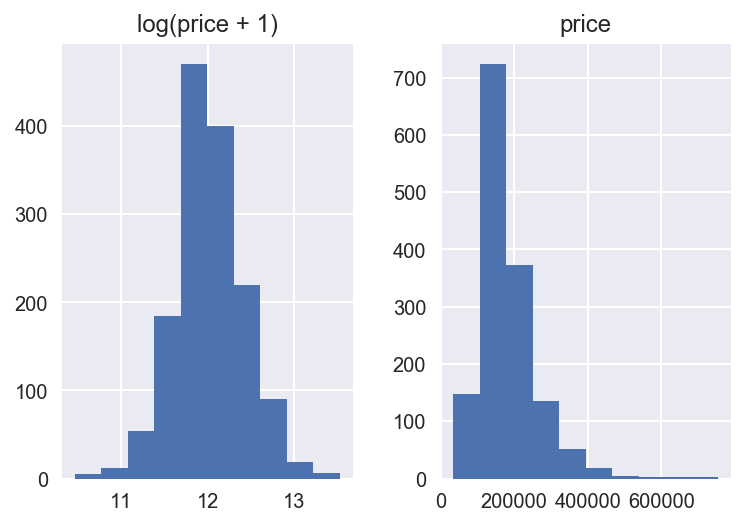

In [70]:
prices = DataFrame({
    "price": train_df.SalePrice,
    "log(price + 1)": np.log1p(train_df.SalePrice)
})
prices.hist()
plt.show()

In [71]:
y_train = np.log1p(train_df['SalePrice'])
# train_df.drop(['SalePrice'], axis=1, inplace=True)
del train_df['SalePrice']

In [73]:
all_df = pd.concat((train_df, test_df), axis=0)
all_df.shape

(2919, 79)

MSSubClass 这个字段是字符型。

In [76]:
all_df.MSSubClass.dtypes

dtype('int64')

In [77]:
all_df.MSSubClass = all_df.MSSubClass.astype(str)

In [78]:
all_df.MSSubClass.value_counts()

20     1079
60      575
50      287
120     182
30      139
160     128
70      128
80      118
90      109
190      61
85       48
75       23
45       18
180      17
40        6
150       1
Name: MSSubClass, dtype: int64

In [79]:
pd.get_dummies(all_df.MSSubClass, prefix='MSSubClass').head()

,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90
Id,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [13]:
all_dummy_df = pd.get_dummies(all_df)
all_dummy_df.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,...,0,0,0,1,0,0,0,0,1,0
2,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,...,0,0,0,1,0,0,0,0,1,0
3,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,...,0,0,0,1,0,0,0,0,1,0
4,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,...,0,0,0,1,1,0,0,0,0,0
5,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,...,0,0,0,1,0,0,0,0,1,0


统计空值。

In [80]:
all_dummy_df.isnull().sum().sort_values(ascending=False).head()

SaleCondition_Partial    0
Neighborhood_NridgHt     0
Neighborhood_SWISU       0
Neighborhood_Sawyer      0
Neighborhood_SawyerW     0
dtype: int64

In [84]:
mean_cols = all_dummy_df.mean()
mean_cols.head()

LotFrontage   -1.792482e-14
LotArea        8.035234e-17
OverallQual    5.682334e-17
OverallCond    1.263502e-16
YearBuilt     -5.845121e-16
dtype: float64

使用均值填充所有字段。

In [85]:
from sklearn.preprocessing import Imputer

# 使用这一行的平均值来填充，使用 axis 参数指定
imr = Imputer(missing_values='NaN', strategy='mean', axis=1)
imr.fit(all_dummy_df)
imputed_data = imr.transform(all_dummy_df)
imputed_data

/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


array([[-0.20203292, -0.21784137,  0.6460727 , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.5017845 , -0.07203174, -0.06317371, ...,  0.        ,
         1.        ,  0.        ],
       [-0.06126943,  0.13717338,  0.6460727 , ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 4.25547741,  1.24659445, -0.77242013, ...,  0.        ,
         0.        ,  0.        ],
       [-0.3427964 ,  0.03459947, -0.77242013, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.22025754, -0.06860838,  0.6460727 , ...,  0.        ,
         1.        ,  0.        ]])

In [88]:
all_dummy_df = all_dummy_df.fillna(mean_cols)
all_dummy_df.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,-0.202033,-0.217841,0.646073,-0.507197,1.046078,0.896679,0.525112,0.580807,-0.29308,-0.934702,...,0,0,0,1,0,0,0,0,1,0
2,0.501785,-0.072032,-0.063174,2.187904,0.154737,-0.395536,-0.572152,1.177910,-0.29308,-0.629788,...,0,0,0,1,0,0,0,0,1,0
3,-0.061269,0.137173,0.646073,-0.507197,0.980053,0.848819,0.334770,0.097856,-0.29308,-0.288467,...,0,0,0,1,0,0,0,0,1,0
4,-0.436639,-0.078371,0.646073,-0.507197,-1.859033,-0.682695,-0.572152,-0.494856,-0.29308,-0.047266,...,0,0,0,1,1,0,0,0,0,0
5,0.689469,0.518814,1.355319,-0.507197,0.947040,0.753100,1.387248,0.468851,-0.29308,-0.161040,...,0,0,0,1,0,0,0,0,1,0


In [17]:
all_dummy_df.isnull().sum().sum()

0

In [18]:
numeric_cols = all_df.columns[all_df.dtypes != 'object']
numeric_cols

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

数值型变量标准化。

In [19]:
numeric_col_means = all_dummy_df.loc[:, numeric_cols].mean()
numeric_col_std = all_dummy_df.loc[:, numeric_cols].std()
all_dummy_df.loc[:, numeric_cols] = (all_dummy_df.loc[:, numeric_cols] - numeric_col_means) / numeric_col_std

In [20]:
dummy_train_df = all_dummy_df.loc[train_df.index]
dummy_test_df = all_dummy_df.loc[test_df.index]

这么多特征。

In [21]:
dummy_train_df.shape, dummy_test_df.shape

((1460, 303), (1459, 303))

## 岭回归

In [22]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

In [23]:
X_train = dummy_train_df.values
X_test = dummy_test_df.values

直接用交叉验证，没有分割训练集与测试集。

In [98]:
%%time
alphas = np.logspace(-3, 2, 50)
test_scores = list()
for alpha in alphas:
    clf = Ridge(alpha)
    test_score = np.sqrt(-cross_val_score(
        clf, X_train, y_train, cv=10, scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))

CPU times: user 28.6 s, sys: 3.97 s, total: 32.5 s
Wall time: 4.89 s


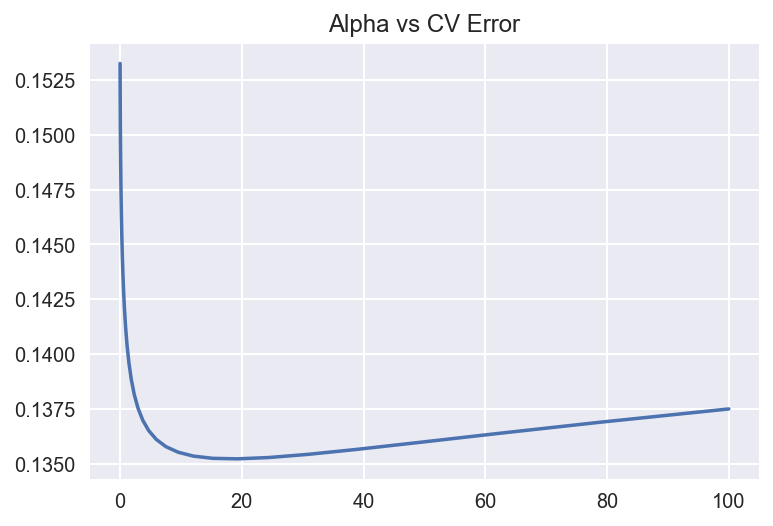

In [99]:
plt.plot(alphas, test_scores)
plt.title("Alpha vs CV Error")
plt.show()

用网格搜索试试看

In [119]:
np.set_printoptions(suppress=True, precision=4)

In [120]:
parameters

{'alpha': array([  0.001 ,   0.0013,   0.0016,   0.002 ,   0.0026,   0.0032,
          0.0041,   0.0052,   0.0066,   0.0083,   0.0105,   0.0133,
          0.0168,   0.0212,   0.0268,   0.0339,   0.0429,   0.0543,
          0.0687,   0.0869,   0.1099,   0.1389,   0.1758,   0.2223,
          0.2812,   0.3556,   0.4498,   0.569 ,   0.7197,   0.9103,
          1.1514,   1.4563,   1.8421,   2.33  ,   2.9471,   3.7276,
          4.7149,   5.9636,   7.5431,   9.541 ,  12.0679,  15.2642,
         19.307 ,  24.4205,  30.8884,  39.0694,  49.4171,  62.5055,
         79.0604, 100.    ])}

In [109]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

parameters = {'alpha': np.logspace(-3, 2, 50)}  # 50 个数
clf = Ridge()
grid = GridSearchCV(
    clf, parameters, cv=5, scoring='neg_mean_squared_error', verbose=2)

In [110]:
%%time
grid.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] alpha=0.001 .....................................................
[CV] ...................................... alpha=0.001, total=   0.0s
[CV] alpha=0.001 .....................................................
[CV] ...................................... alpha=0.001, total=   0.0s
[CV] alpha=0.001 .....................................................
[CV] ...................................... alpha=0.001, total=   0.0s
[CV] alpha=0.001 .....................................................
[CV] ...................................... alpha=0.001, total=   0.0s
[CV] alpha=0.001 .....................................................
[CV] ...................................... alpha=0.001, total=   0.0s
[CV] alpha=0.0012648552168552957 .....................................
[CV] ...................... alpha=0.0012648552168552957, total=   0.0s
[CV] alpha=0.0012648552168552957 .....................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ...................... alpha=0.0020235896477251575, total=   0.0s
[CV] alpha=0.002559547922699536 ......................................
[CV] ....................... alpha=0.002559547922699536, total=   0.0s
[CV] alpha=0.002559547922699536 ......................................
[CV] ....................... alpha=0.002559547922699536, total=   0.0s
[CV] alpha=0.002559547922699536 ......................................
[CV] ....................... alpha=0.002559547922699536, total=   0.0s
[CV] alpha=0.002559547922699536 ......................................
[CV] ....................... alpha=0.002559547922699536, total=   0.0s
[CV] alpha=0.002559547922699536 ......................................
[CV] ....................... alpha=0.002559547922699536, total=   0.0s
[CV] alpha=0.0032374575428176433 .....................................
[CV] ...................... alpha=0.0032374575428176433, total=   0.0s
[CV] alpha=0.0032374575428176433 .....................................
[CV] .

[CV] ......................... alpha=0.0339322177189533, total=   0.0s
[CV] alpha=0.0339322177189533 ........................................
[CV] ......................... alpha=0.0339322177189533, total=   0.0s
[CV] alpha=0.0339322177189533 ........................................
[CV] ......................... alpha=0.0339322177189533, total=   0.0s
[CV] alpha=0.04291934260128778 .......................................
[CV] ........................ alpha=0.04291934260128778, total=   0.0s
[CV] alpha=0.04291934260128778 .......................................
[CV] ........................ alpha=0.04291934260128778, total=   0.0s
[CV] alpha=0.04291934260128778 .......................................
[CV] ........................ alpha=0.04291934260128778, total=   0.0s
[CV] alpha=0.04291934260128778 .......................................
[CV] ........................ alpha=0.04291934260128778, total=   0.0s
[CV] alpha=0.04291934260128778 .......................................
[CV] .

[CV] .......................... alpha=1.151395399326448, total=   0.0s
[CV] alpha=1.4563484775012443 ........................................
[CV] ......................... alpha=1.4563484775012443, total=   0.0s
[CV] alpha=1.4563484775012443 ........................................
[CV] ......................... alpha=1.4563484775012443, total=   0.0s
[CV] alpha=1.4563484775012443 ........................................
[CV] ......................... alpha=1.4563484775012443, total=   0.0s
[CV] alpha=1.4563484775012443 ........................................
[CV] ......................... alpha=1.4563484775012443, total=   0.0s
[CV] alpha=1.4563484775012443 ........................................
[CV] ......................... alpha=1.4563484775012443, total=   0.0s
[CV] alpha=1.8420699693267164 ........................................
[CV] ......................... alpha=1.8420699693267164, total=   0.0s
[CV] alpha=1.8420699693267164 ........................................
[CV] .

[CV] ......................... alpha=49.417133613238384, total=   0.0s
[CV] alpha=49.417133613238384 ........................................
[CV] ......................... alpha=49.417133613238384, total=   0.0s
[CV] alpha=49.417133613238384 ........................................
[CV] ......................... alpha=49.417133613238384, total=   0.0s
[CV] alpha=49.417133613238384 ........................................
[CV] ......................... alpha=49.417133613238384, total=   0.0s
[CV] alpha=49.417133613238384 ........................................
[CV] ......................... alpha=49.417133613238384, total=   0.0s
[CV] alpha=62.50551925273976 .........................................
[CV] .......................... alpha=62.50551925273976, total=   0.0s
[CV] alpha=62.50551925273976 .........................................
[CV] .......................... alpha=62.50551925273976, total=   0.0s
[CV] alpha=62.50551925273976 .........................................
[CV] .

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    2.7s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': array([1.00000e-03, 1.26486e-03, 1.59986e-03, 2.02359e-03, 2.55955e-03,
       3.23746e-03, 4.09492e-03, 5.17947e-03, 6.55129e-03, 8.28643e-03,
       1.04811e-02, 1.32571e-02, 1.67683e-02, 2.12095e-02, 2.68270e-02,
       3.39322e-02, 4.29193e-02, 5.42868e-02, 6.86649e-02, 8.68... 2.44205e+01, 3.08884e+01,
       3.90694e+01, 4.94171e+01, 6.25055e+01, 7.90604e+01, 1.00000e+02])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=2)

In [111]:
grid.best_estimator_

Ridge(alpha=15.264179671752334, copy_X=True, fit_intercept=True,
   max_iter=None, normalize=False, random_state=None, solver='auto',
   tol=0.001)

In [121]:
grid.best_score_

-0.019796473387021507

In [122]:
grid.best_params_

{'alpha': 15.264179671752334}

## 随机森林回归

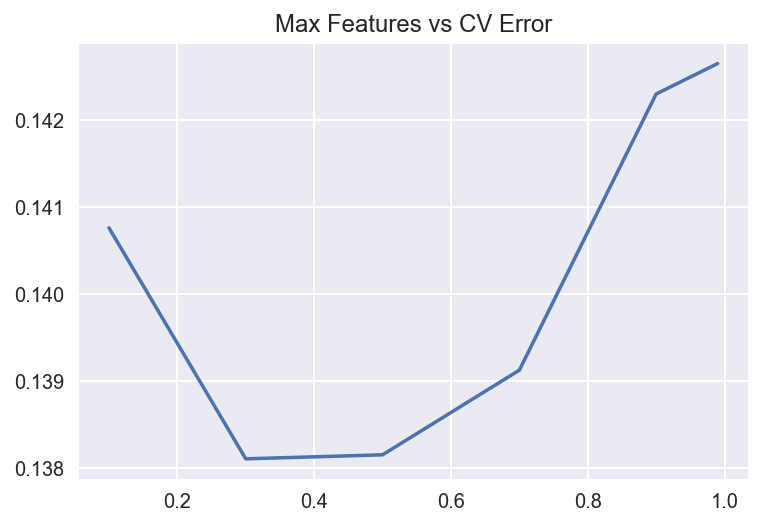

In [123]:
from sklearn.ensemble import RandomForestRegressor

max_features = [.1, .3, .5, .7, .9, .99]
test_scores = list()
for max_feat in max_features:
    clf = RandomForestRegressor(n_estimators=200, max_features=max_feat)
    test_score = np.sqrt(-cross_val_score(
        clf, X_train, y_train, cv=5, scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))
plt.plot(max_features, test_scores)
plt.title("Max Features vs CV Error")
plt.show()

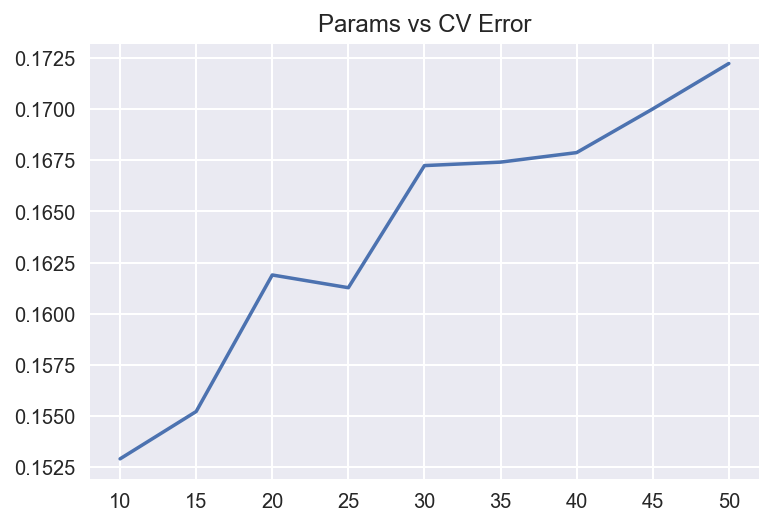

In [124]:
from sklearn.ensemble import AdaBoostRegressor

params = [10, 15, 20, 25, 30, 35, 40, 45, 50]
test_scores = list()
for param in params:
    clf = AdaBoostRegressor(n_estimators=param, base_estimator=Ridge(15))
    test_score = np.sqrt(-cross_val_score(clf, X_train, y_train, cv=10, scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))
plt.plot(params, test_scores)
plt.title("Params vs CV Error")
plt.show()

In [125]:
from sklearn.ensemble import BaggingRegressor

bg = BaggingRegressor(n_estimators=25, base_estimator=Ridge(15))
bg.fit(X_train, y_train)
y_final = np.expm1(bg.predict(X_test))

最后使用岭回归的袋装集成方法。

In [126]:
submission_df = DataFrame(data={"Id": test_df.index, 'SalePrice': y_final})
submission_df.head()

,Id,SalePrice
0,1461,113128.473976
1,1462,144929.184145
2,1463,171039.206834
3,1464,195607.518539
4,1465,195670.459078


In [128]:
submission_df.to_csv('./submission_20190323.csv',index=False)